## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform wine segmentation.

### b) Defining the Metric for Success

The project will be a success when we are able to create clusters with clear boundaries.

### c) Understanding the Context 

Champagne Company is a leading wine company that specialises in the importation and
distribution of premium and super-premium wines, champagnes and spirits within the
East African region. The main goal of the company is to make the most exclusive brands
of wine more accessible at an affordable price. The company wants to satisfy the
growing local demand for specialised products and the ever-increasing tourism industry
where guests don ́t want to settle for less.

### d) Recording the Experimental Design

- Define the Research Question
- Data Importation
- Data Exploration
- Data Cleaning
- Data Analysis (Univariate and Bivariate)
- Data Preparation
- Data Modeling
- Model Evaluation
- Recommendations / Conclusion
- Challenging your Solution

### e) Data Relevance

The dataset is appropriate to answering the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('https://bit.ly/2UBJERh')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# check dataset shape
df.shape

(178, 13)

In [4]:
# chekc data types
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

All our variables are numerical.

In [5]:
# dropping duplicates, if any

print(df.duplicated().any())

df.drop_duplicates(inplace = True)
df.shape

False


(178, 13)

No duplicated values dropped.

In [6]:
# check for missing data
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

In [7]:
# get descriptive statistics
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


From the descriptive statististics, we see that some features have large ranges, which means we will need to scale them.

In [8]:
!pip install mplcyberpunk
  
import matplotlib.pyplot as plt
import mplcyberpunk
# plt.style.use("cyberpunk")
# plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
# plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
# plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')
# Add glow effects-Optional
# mplcyberpunk.add_glow_effects()
# plt.show()

In [9]:
import matplotlib.style as style

style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

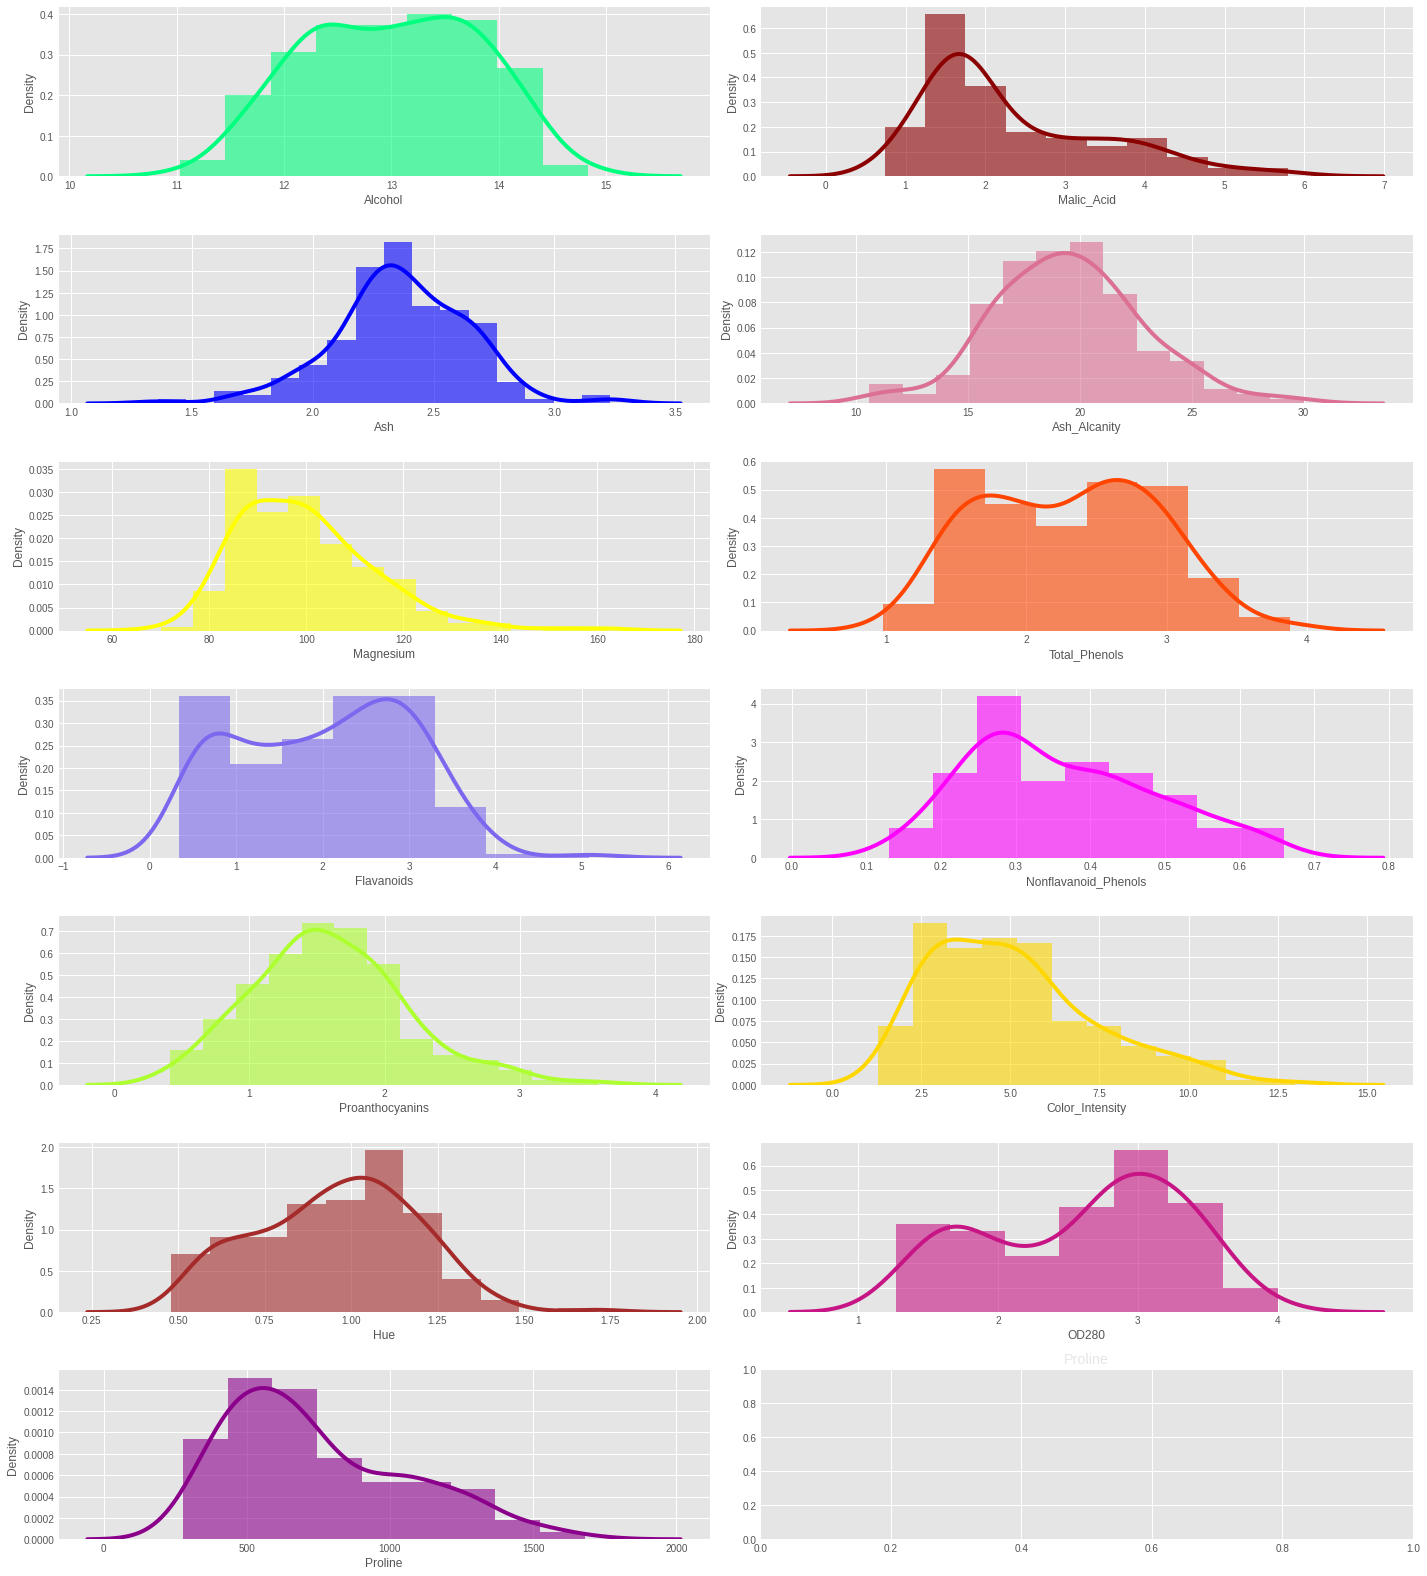

In [38]:
# previewing the histograms of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (20, 22))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

plt.style.use("ggplot")
for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.distplot(df[col], ax = ax, color = color, hist_kws = dict(alpha = 0.6))
    plt.title(col)
    
plt.tight_layout()
plt.show()

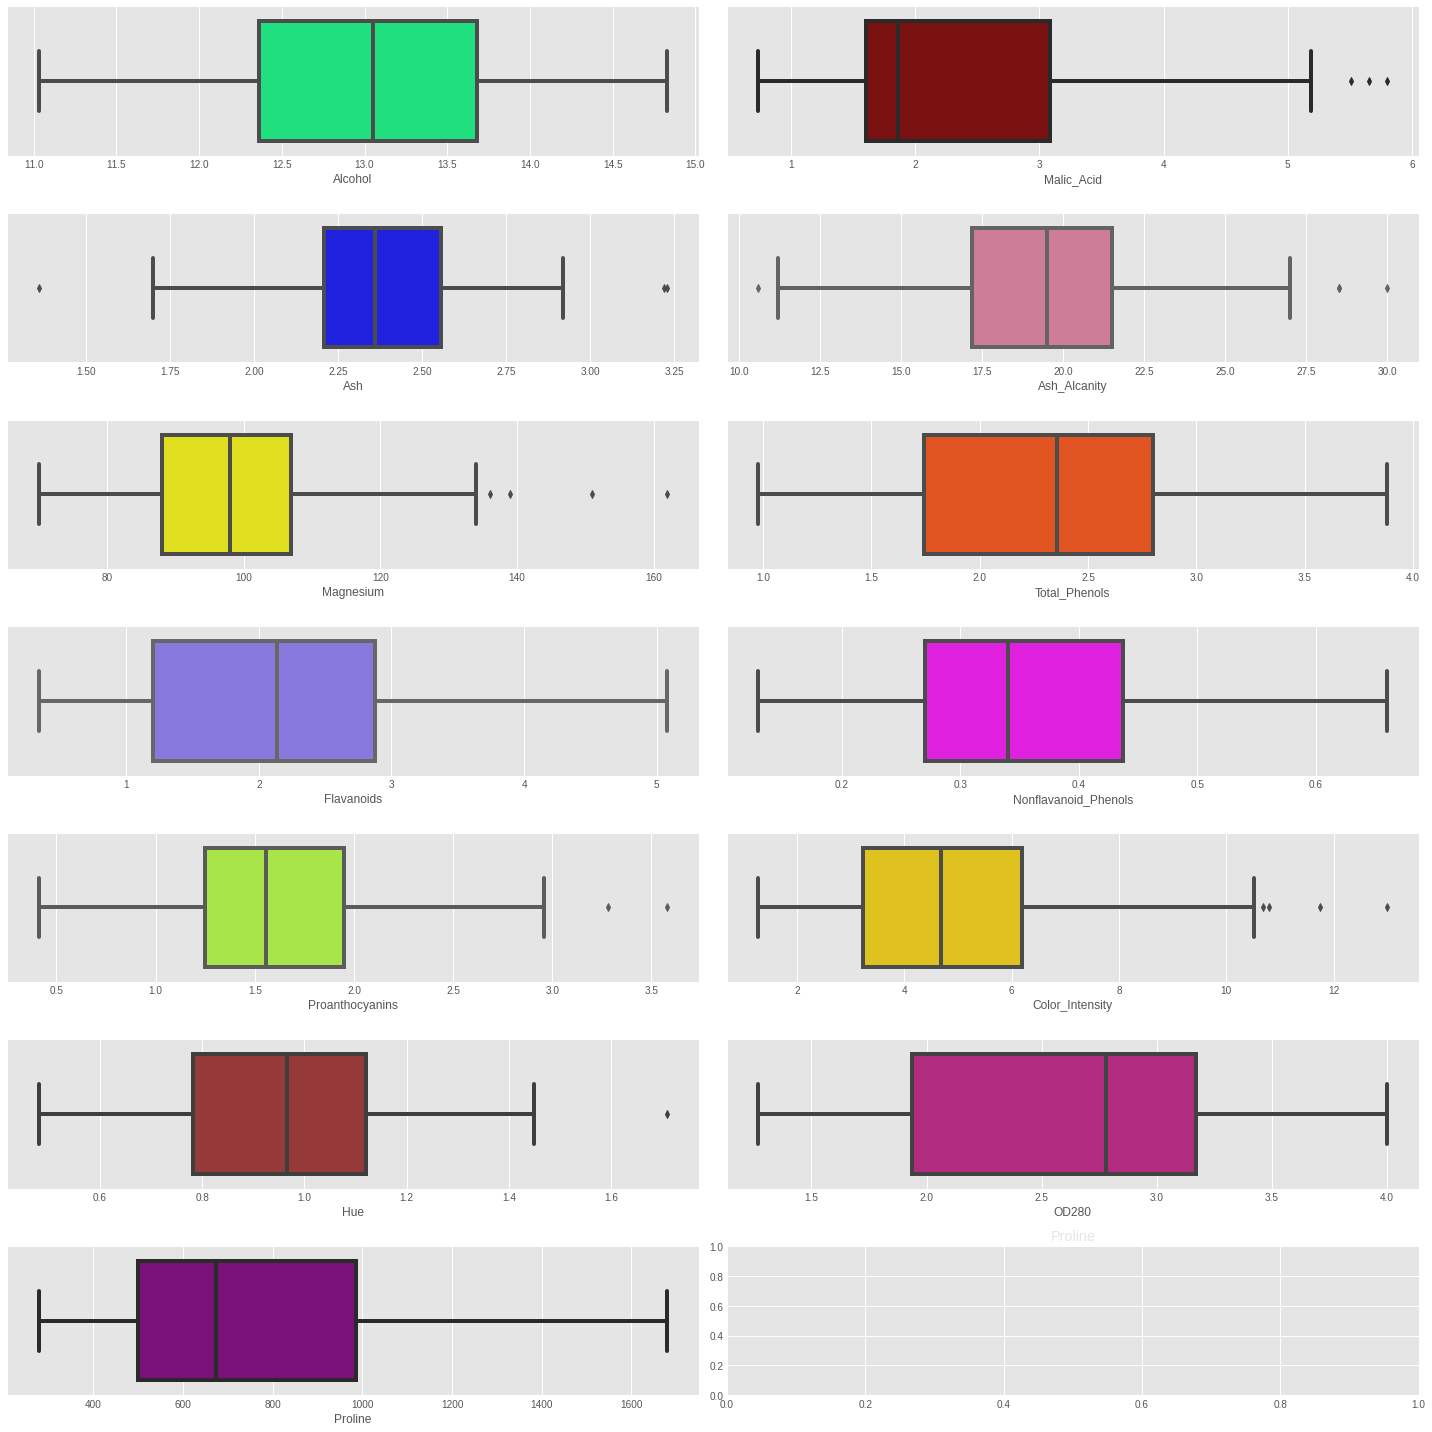

In [36]:
# previewing the boxplots of each variable
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (20, 20))

cols = df.columns.to_list()
colors = ['#00FF7F', '#8B0000', '#0000FF', '#DB7093', '#FFFF00', '#FF4500', '#7B68EE', '#FF00FF',
          '#ADFF2F', '#FFD700', '#A52A2A', '#C71585', '#8B008B']

plt.style.use("ggplot")
for col, color, ax in zip(cols, colors, axes.flatten()):
    sns.boxplot(df[col], ax = ax, color = color)
    plt.title(col)
    
plt.tight_layout()

We can see that some of the variables have a few outliers. We will not remove them because we want to see how they will impact the clustering model.

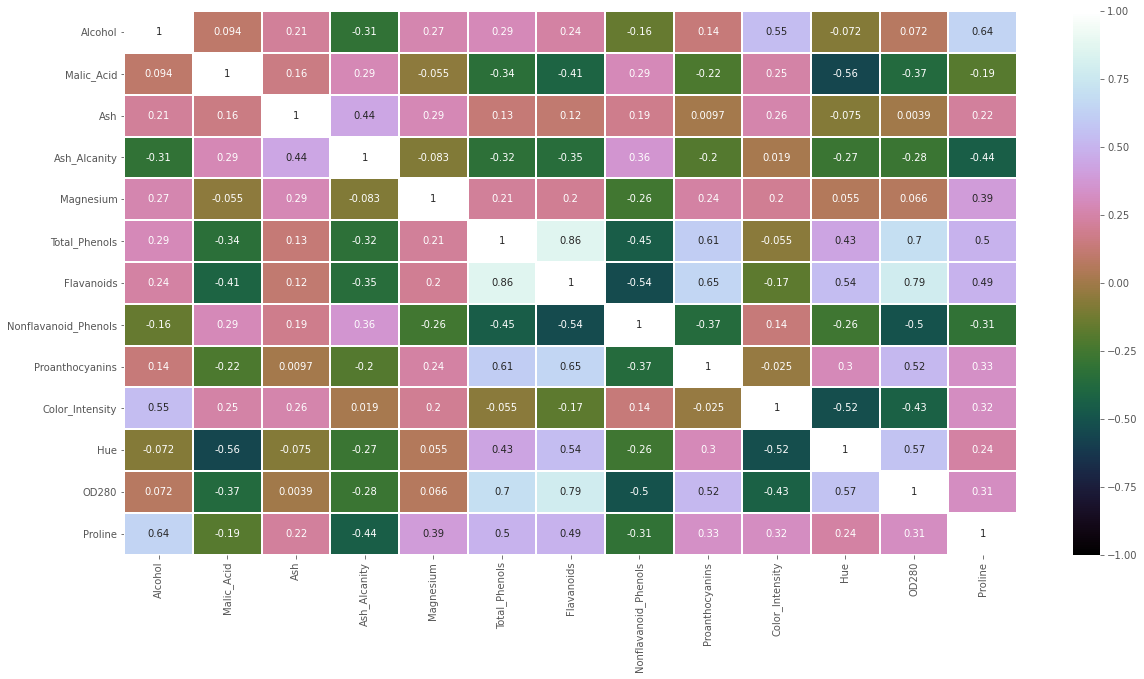

In [12]:
# previewing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (20, 10))
sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, cmap = 'cubehelix', linewidths='1.0')
plt.show()

There is a strong positive correlation between Total_Phenols and Flavanoids (0.86), total_Phenols and OD280 (0.79), and 0D280 and Flavanoids (0.79).

## <font color='#2F4F4F'>4. Data Modeling</font>

In [13]:
# set all the features into X

X = df.values
X.shape

(178, 13)

In [14]:

# Scaling our values to give them all equal importance. 
# Scaling is also important as the distance between points 
# affects the way clusters are formed.
# ---
# 
# Scale our features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit and transform our features
X = sc.fit_transform(X)

### 4.1 KMeans Clustering

In [15]:
# fitting KMeans with 5 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
# getting the cluster labels

kmeans.labels_

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 4, 3, 4,
       2, 2, 3, 2, 3, 4, 3, 4, 4, 2, 2, 3, 2, 4, 2, 2, 3, 0, 4, 2, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 1, 4, 2, 4, 4, 2, 2, 4, 2, 2, 3, 2, 3, 2, 4,
       4, 4, 3, 3, 3, 3, 2, 4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

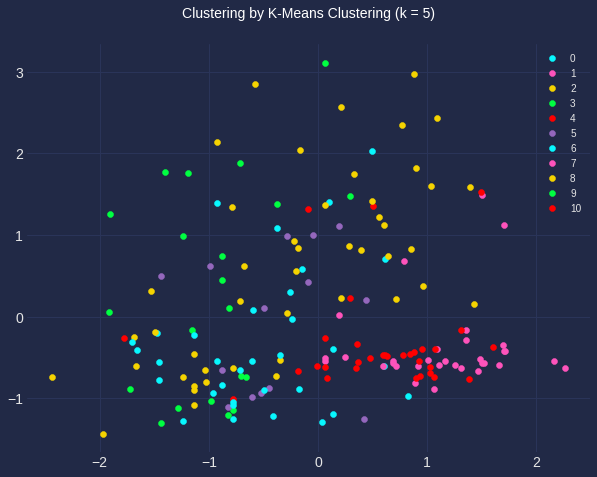

In [39]:
# getting the KMeans scatter plot
kmeans_pred = kmeans.labels_
kmeans_clust = np.unique(kmeans_pred)

plt.style.use("cyberpunk")
plt.figure(figsize = (9, 7))
for cluster in kmeans_clust:
    row_ix = np.where(kmeans_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    
plt.title("Clustering by K-Means Clustering (k = 5)", y=1.05, fontsize=14, color="White")
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.legend()
plt.show()

In [18]:
# 1. Getting the optimum value of k for our KMeans model using the Elbow Method

# We will first define an empy list where we will be required to store our errors
# ---
#
errors_list = []

# Calculating the sum of errors for 1-10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    errors_list.append(kmeans.inertia_)

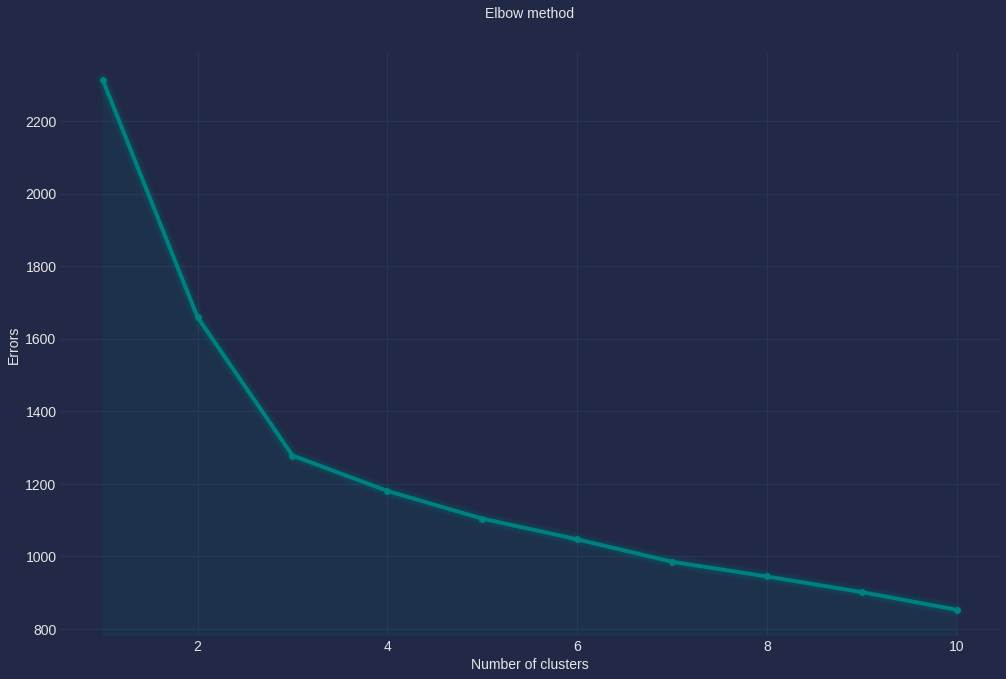

In [49]:
# visualizing the distribution of errors per number of clusters
# We plot our elbow method visualisation: No. of clusters vs Error
# ---
# 

plt.style.use("cyberpunk")
plt.figure(figsize=(15,10))
plt.plot(range(1, 11), errors_list, 'bx-', marker='o', color= 'teal')
plt.title('Elbow method', fontsize=14, y=1.05)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Errors", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
mplcyberpunk.add_glow_effects()
plt.show()


**The output graph of the Elbow method is shown above. As we can see, the optimal value of k is 3, as the elbow-like shape is formed at k=3 in the above graph. We can implement k-means again using k = 3.**

In [20]:
# 2. Getting the optimum value of k for our KMeans model using the Silhouette Analysis

from sklearn.metrics import silhouette_score
silhouette = [] # list of separation distance between the resulting clusters for each value of k 

K = range(2, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    silhouette.append(silhouette_score(X, kmeans.labels_))

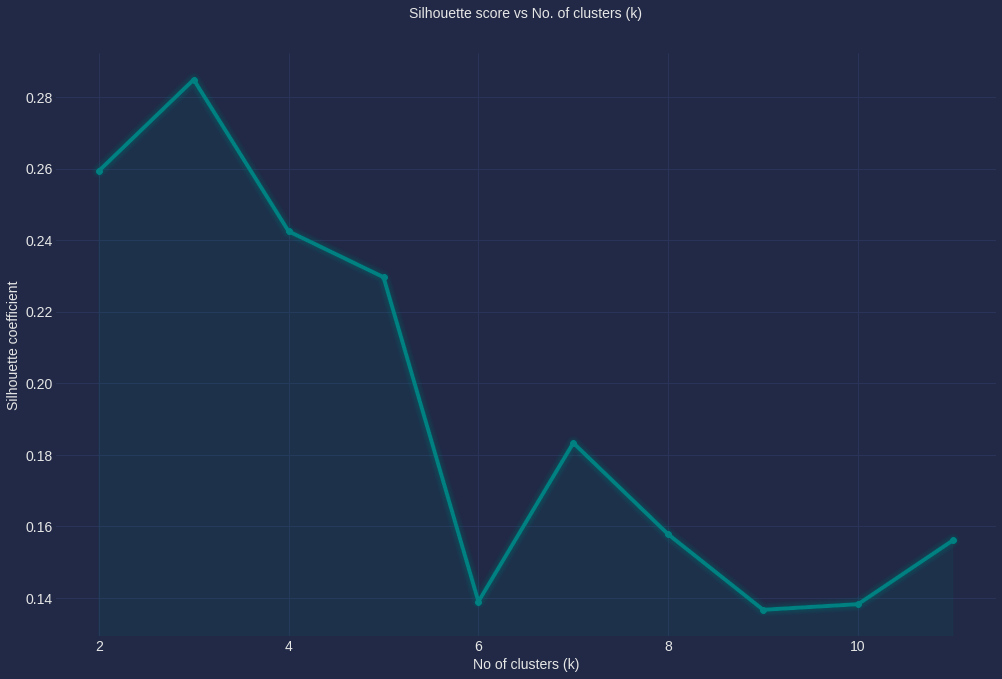

In [50]:
# We plot our Silhouette Plot
# ---
# 
plt.figure(figsize=(15,10))
plt.plot(range(2, 12), silhouette, 'bx-', marker='o', color="teal")
plt.title('Silhouette score vs No. of clusters (k)', fontsize=14, y=1.05)
plt.xlabel('No of clusters (k)', fontsize=14)
plt.ylabel('Silhouette coefficient', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
mplcyberpunk.add_glow_effects()
plt.grid(True);

**The silhouette plot shows the that the silhouette coefficient was highest when k = 3, suggesting that's the optimal number of clusters. Three clusters best captures the segmentation of this data set.**

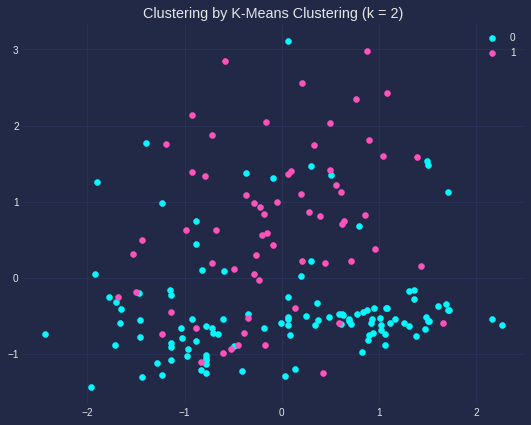

In [22]:
# Let's try to improve our model using different cluster numbers (K) and visualizing them

# Setting k to 2 
k2 = KMeans(2)
k2.fit(X)

# Getting the cluster labels
k2_labels = k2.labels_


# Visualizing the improvement
k2_pred = k2_labels
k2_clust = np.unique(k2_pred)

plt.figure(figsize = (9, 7))
for cluster in k2_clust:
    row_ix = np.where(k2_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    

plt.title("Clustering by K-Means Clustering (k = 2)")
plt.legend()
plt.show()

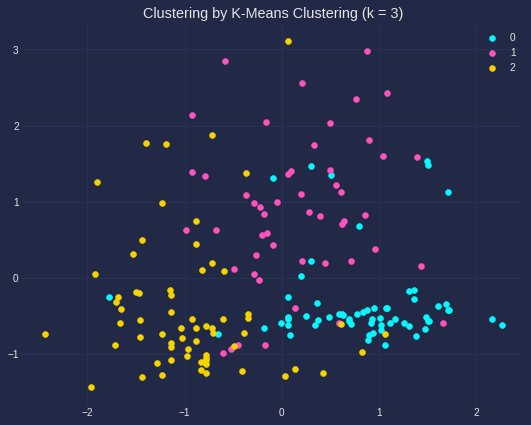

In [23]:
# Setting k to 3 to which is the optimal number of clusters
k3 = KMeans(3)
k3.fit(X)

# Getting the cluster labels
k3_labels = k3.labels_


# Visualizing the improvement
k3_pred = k3_labels
k3_clust = np.unique(k3_pred)

plt.figure(figsize = (9, 7))
for cluster in k3_clust:
    row_ix = np.where(k3_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    

plt.title("Clustering by K-Means Clustering (k = 3)")
plt.legend()
plt.show()

We see that we have better results when k=3, so we will add these to our dataset.

In [24]:
# Add these cluster labels to our dataset
df['kmeans_cluster_group'] = k3_labels

# Previewing a sample of our dataset
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,2
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,2
143,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550,1
34,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095,0
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150,0
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650,1
56,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970,0


In [25]:
first_cluster = df[df.kmeans_cluster_group.isin([0])]
first_cluster.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [26]:
second_cluster = df[df.kmeans_cluster_group.isin([1])]
second_cluster.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,1
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,1
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372,1
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630,1
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,1


In [27]:
third_cluster = df[df.kmeans_cluster_group.isin([2])]
third_cluster.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,2
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,2


2    65
0    62
1    51
Name: kmeans_cluster_group, dtype: int64


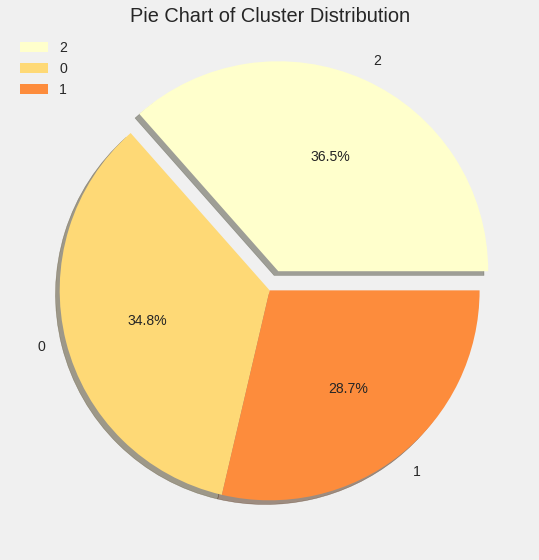

In [116]:
# plotting the pie chart of the distribution of the clusters

print(df.kmeans_cluster_group.value_counts())

labels = ['2', '0', '1']
sizes = df['kmeans_cluster_group'].value_counts()
colors = plt.cm.YlOrRd(np.linspace(0, 1, 5))
explode = [0.1, 0.0, 0.0]

plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%1.1f%%')
plt.title('Pie Chart of Cluster Distribution', fontsize = 20)
plt.legend()
plt.show()

Cluster 0 has the highest number of data points (36.5%) closest to each other  and cluster 1 had the least number of data points (28.7%) closest to each other

### 4.2 Hierarchical Agglomerative Clustering

In [29]:
# fitting agglomerative clustering with 5 clusters
from sklearn.cluster import AgglomerativeClustering as AC

agg = AC(n_clusters = 5)
agg.fit(X)

# Getting the cluster labels
agg_labels = agg.labels_
agg_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0,
       0, 1, 2, 1, 2, 0, 3, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4])

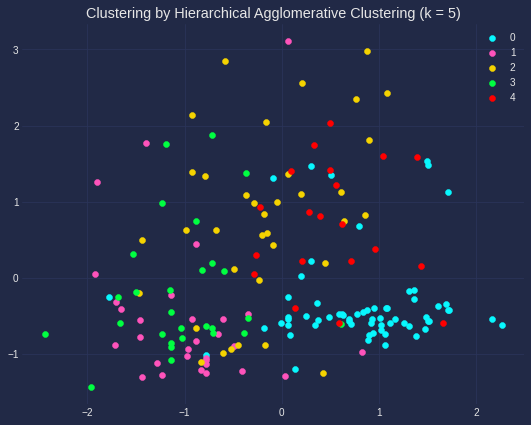

In [30]:
# Creating a scatter plot of the cluster analysis
agg_pred = agg_labels
agg_clust = np.unique(agg_pred)

plt.style.use("cyberpunk")
plt.figure(figsize = (9, 7))
for cluster in agg_clust:
    row_ix = np.where(agg_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    

plt.title("Clustering by Hierarchical Agglomerative Clustering (k = 5)")
plt.legend()
plt.show()

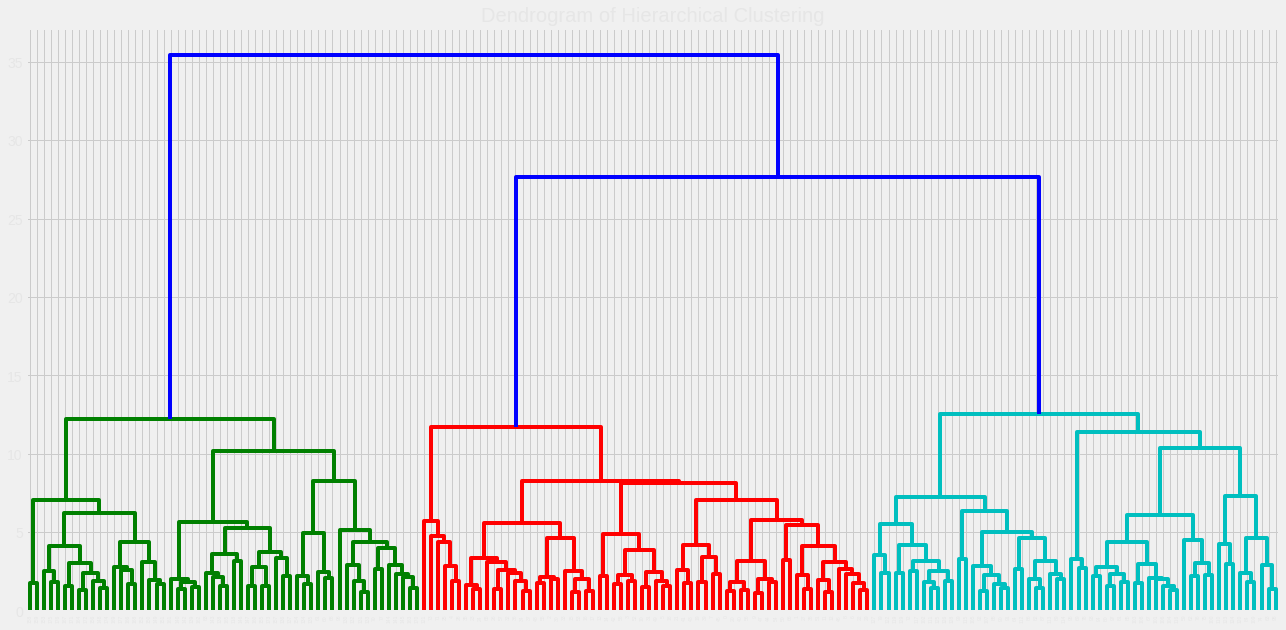

In [31]:
# creating a dendrogram of our agglomerative clustering analysis
from scipy.cluster import hierarchy

plt.style.use("fivethirtyeight")
plt.figure(figsize = (20, 10))
hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title("Dendrogram of Hierarchical Clustering")
plt.show()

**If we were to draw a horizontal line that cuts through all the vertical blue lines with the highest heights showing the furthest distances, we would cut through three lines ideally showing that there are three cluster groups**

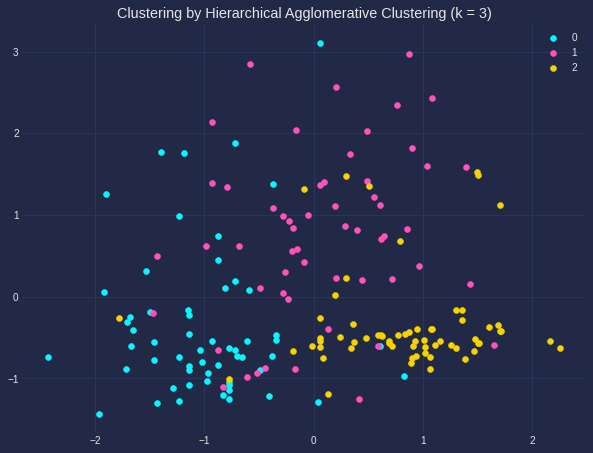

In [54]:
# agglomerative clustering with 3 clusters
agg3 = AC(n_clusters = 3)
agg3.fit(X)

agg3_labels = agg3.labels_
agg3_clust = np.unique(agg3_labels)

plt.style.use("cyberpunk")
plt.figure(figsize = (9, 7))
for cluster in agg3_clust:
    row_ix = np.where(agg3_labels == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)
    

plt.title("Clustering by Hierarchical Agglomerative Clustering (k = 3)")
plt.legend()
plt.show()

**Using 3 clusters instead of 5 has yielded a better result, so we will add the results to our dataset as well so we can compare how the hierarchical agglomerative clustering results differ from the k-means clustering results.**

In [33]:
# adding to our dataset
df['agglomerative_cluster_group'] = agg3_labels

# previewing a sample of our dataset
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster_group,agglomerative_cluster_group
31,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515,0,2
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,1,1
57,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270,0,2
26,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195,0,2
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650,1,1
84,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520,2,0
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,0,2
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675,1,1
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675,1,1
142,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520,1,1


## <font color='#2F4F4F'>5. Summary of Findings</font>

We see that using k=3 is the best parameter to set when performing clustering on this dataset.

## <font color='#2F4F4F'>6. Recommendations</font>

While the two clustering models performed fairly well, I recommend further analysis and modeling to improve the solution until clear cluster boundaries are established.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
**Yes**

#### b) Did we have the right data?
**Yes**

#### c) What can be done to improve the solution?
Try out other clustering algorithms to see if they will improve the solution. Like:

* Affinity Propagation
* Birch Clustering
* DBSCAN Clustering

We can also try removing outliers and highly correlated variables to see if it will improve the model.

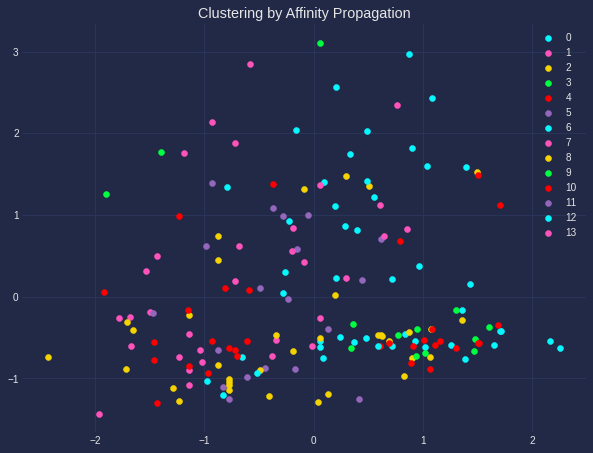

In [55]:
# Affinity Propagation
from sklearn.cluster import AffinityPropagation as AP

ap = AP()
ap.fit(X)

ap_pred = ap.predict(X)
clusters = np.unique(ap_pred)

plt.figure(figsize = (9, 7))
for cluster in clusters:
    row_ix = np.where(ap_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)

plt.title("Clustering by Affinity Propagation")
plt.legend()
plt.show()

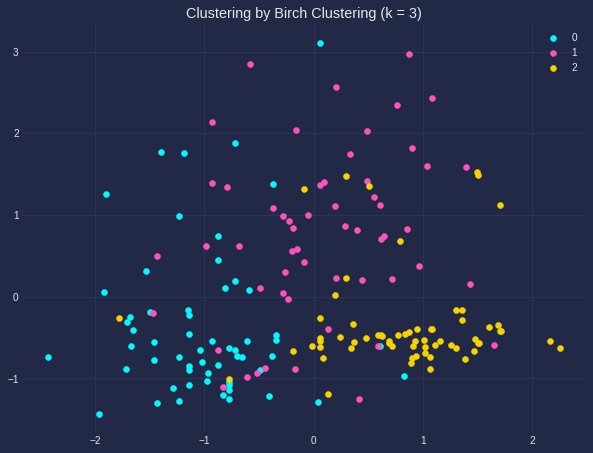

In [57]:
# Birch clustering
from sklearn.cluster import Birch

birch = Birch()
birch.fit(X)

birch_pred = birch.predict(X)
birch_clust = np.unique(birch_pred)

plt.figure(figsize = (9, 7))
for cluster in birch_clust:
    row_ix = np.where(birch_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)

plt.title("Clustering by Birch Clustering (k = 3)")
plt.legend()
plt.show()

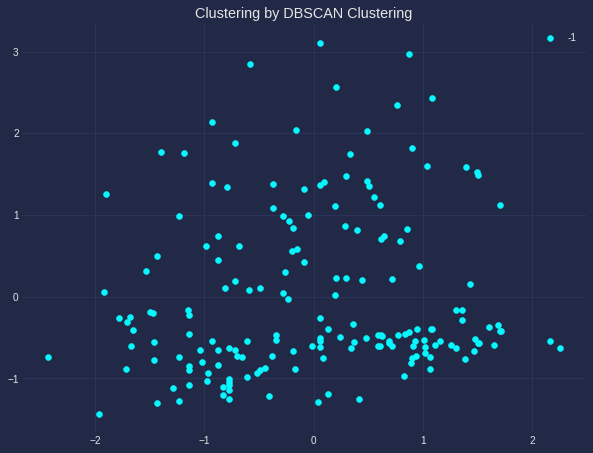

In [58]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.30, min_samples = 9)
dbscan.fit(X)

dbscan_pred = dbscan.labels_
dbscan_clust = np.unique(dbscan_pred)

plt.figure(figsize = (9, 7))
for cluster in dbscan_clust:
    row_ix = np.where(dbscan_pred == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label = cluster)

plt.title("Clustering by DBSCAN Clustering")
plt.legend()
plt.show()